<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data,-policy-and-model-initialization" data-toc-modified-id="Data,-policy-and-model-initialization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data, policy and model initialization</a></span><ul class="toc-item"><li><span><a href="#Load-contact-data" data-toc-modified-id="Load-contact-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load contact data</a></span></li><li><span><a href="#Load-publically-available-data-from-Sciensano" data-toc-modified-id="Load-publically-available-data-from-Sciensano-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load publically available data from Sciensano</a></span></li><li><span><a href="#Load-posterior-parameter-distributions-of-calibrated-parameters" data-toc-modified-id="Load-posterior-parameter-distributions-of-calibrated-parameters-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load posterior parameter distributions of calibrated parameters</a></span></li><li><span><a href="#Settings" data-toc-modified-id="Settings-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Settings</a></span></li></ul></li><li><span><a href="#Scenario-S(trict):-lockdown" data-toc-modified-id="Scenario-S(trict):-lockdown-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Scenario S(trict): lockdown</a></span></li><li><span><a href="#Scenario-F(ree):-no-lockdown" data-toc-modified-id="Scenario-F(ree):-no-lockdown-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Scenario F(ree): no lockdown</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Try-out-functions" data-toc-modified-id="Try-out-functions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Try-out functions</a></span></li><li><span><a href="#Scenarios-S(trict)" data-toc-modified-id="Scenarios-S(trict)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Scenarios S(trict)</a></span><ul class="toc-item"><li><span><a href="#Scenario-S2:-Vaccination-old-to-young,-eff=0.7" data-toc-modified-id="Scenario-S2:-Vaccination-old-to-young,-eff=0.7-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Scenario S2: Vaccination old to young, eff=0.7</a></span></li><li><span><a href="#Scenario-S3:-First-the-most-interactive,-eff=0.7" data-toc-modified-id="Scenario-S3:-First-the-most-interactive,-eff=0.7-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Scenario S3: First the most interactive, eff=0.7</a></span></li><li><span><a href="#Scenario-S4:-Vaccination-old-to-young,-eff=0.9" data-toc-modified-id="Scenario-S4:-Vaccination-old-to-young,-eff=0.9-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Scenario S4: Vaccination old to young, eff=0.9</a></span></li><li><span><a href="#Scenario-S5:-First-the-most-mobile,-eff=0.9" data-toc-modified-id="Scenario-S5:-First-the-most-mobile,-eff=0.9-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Scenario S5: First the most mobile, eff=0.9</a></span></li></ul></li><li><span><a href="#Figures-lockdown-case-S" data-toc-modified-id="Figures-lockdown-case-S-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Figures lockdown-case S</a></span></li><li><span><a href="#Scenarios-F(ree)" data-toc-modified-id="Scenarios-F(ree)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Scenarios F(ree)</a></span><ul class="toc-item"><li><span><a href="#Scenario-F2:-Vaccination-old-to-young,-eff=0.7" data-toc-modified-id="Scenario-F2:-Vaccination-old-to-young,-eff=0.7-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Scenario F2: Vaccination old to young, eff=0.7</a></span></li><li><span><a href="#Scenario-F3:-First-the-most-interactive,-eff=0.7" data-toc-modified-id="Scenario-F3:-First-the-most-interactive,-eff=0.7-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Scenario F3: First the most interactive, eff=0.7</a></span></li><li><span><a href="#Scenario-F4:-Vaccination-old-to-young,-eff=0.9" data-toc-modified-id="Scenario-F4:-Vaccination-old-to-young,-eff=0.9-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Scenario F4: Vaccination old to young, eff=0.9</a></span></li><li><span><a href="#Scenario-F5:-First-the-most-mobile,-eff=0.9" data-toc-modified-id="Scenario-F5:-First-the-most-mobile,-eff=0.9-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Scenario F5: First the most mobile, eff=0.9</a></span></li></ul></li><li><span><a href="#Figures-free-case-F" data-toc-modified-id="Figures-free-case-F-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Figures free-case F</a></span></li><li><span><a href="#Fast-plotting" data-toc-modified-id="Fast-plotting-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Fast plotting</a></span></li></ul></div>


*Authored by T.W. Alleman in consultation with the BIOMATH research unit headed by prof. Ingmar Nopens.*

Copyright (c) 2020 by T.W. Alleman, BIOMATH, Ghent University. All Rights Reserved.

In [17]:
import numpy as np
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import datetime
import scipy
import json
import random

from covid19model.optimization import objective_fcns
from covid19model.models import models
from covid19model.models.utils import draw_sample_COVID19_SEIRD
from covid19model.models.time_dependant_parameter_fncs import ramp_fun, google_lockdown
from covid19model.data import google, sciensano, model_parameters
from covid19model.visualization.output import population_status, infected, _apply_tick_locator
from covid19model.visualization.optimization import plot_fit, traceplot

plt.rcParams.update({'font.size': 12, 'axes.grid':True, 'grid.linewidth':0.3})
pd.plotting.register_matplotlib_converters()

# OPTIONAL: Load the "autoreload" extension so that package code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data, policy and model initialization

## Load contact data

In [2]:
# Load the interaction matrices (size: 9x9)
initN, Nc_home, Nc_work, Nc_schools, Nc_transport, Nc_leisure, Nc_others, Nc_total = model_parameters.get_interaction_matrices(dataset='willem_2012',intensity='all')
# Define the number of age categories
levels = initN.size

initN, Nc_home_15, Nc_work_15, Nc_schools_15, Nc_transport_15, Nc_leisure_15, Nc_others_15, Nc_total_15 = model_parameters.get_interaction_matrices(dataset='willem_2012',intensity='more_15_min')
initN, Nc_home_1hr, Nc_work_1hr, Nc_schools_1hr, Nc_transport_1hr, Nc_leisure_1hr, Nc_others_1hr, Nc_total_1hr = model_parameters.get_interaction_matrices(dataset='willem_2012',intensity='more_one_hour')

In [3]:
Nc_all = {'total': Nc_total, 'home':Nc_home, 'work': Nc_work, 'schools': Nc_schools, 'transport': Nc_transport, 'leisure': Nc_leisure, 'others': Nc_others}
Nc_15min = {'total': Nc_total_15, 'home': Nc_home_15, 'work': Nc_work_15, 'schools': Nc_schools_15, 'transport': Nc_transport_15, 'leisure': Nc_leisure_15, 'others': Nc_others_15}
Nc_1hr = {'total': Nc_total_1hr, 'home': Nc_home_1hr, 'work': Nc_work_1hr, 'schools': Nc_schools_1hr, 'transport': Nc_transport_1hr, 'leisure': Nc_leisure_1hr, 'others': Nc_others_1hr}

In [4]:
# fig,ax = plt.subplots()
# plt.imshow(Nc_total, cmap='viridis')
# plt.colorbar()

## Load publically available data from Sciensano

In [5]:
df_sciensano = sciensano.get_sciensano_COVID19_data(update=False)
df_sciensano['D_cum'] = df_sciensano.D_tot.cumsum()

In [6]:
df_google = google.get_google_mobility_data(update=False, plot=False)

In [7]:
df_non_public = pd.read_csv('../data/interim/non_public/all_nonpublic_timeseries_arr.csv')

<IPython.core.display.Javascript object>


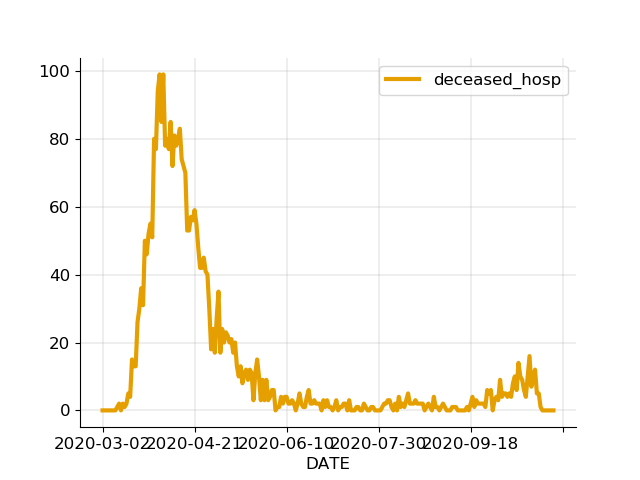

In [8]:
deaths = df_non_public.groupby(by='DATE').deceased_hosp.sum().reset_index()
fig,ax = plt.subplots()
deaths.plot('DATE','deceased_hosp', ax=ax)

## Load posterior parameter distributions of calibrated parameters

In [9]:
# Load samples dictionary of the first wave
with open('../data/interim/model_parameters/COVID19_SEIRD/calibrations/national/BE_2020-11-26_WAVE2_GOOGLE.json', 'r') as fp:
    samples_dict = json.load(fp)

with open('../data/interim/model_parameters/COVID19_SEIRD/calibrations/national/google/initial_states_2020-09-01.json', 'r') as fp:
    initial_states_sept = json.load(fp) 

In [ ]:
# fig,ax = plt.subplots()
# pd.Series(samples_dict['beta']).hist()
# pd.Series(samples_dict['tau']).hist()

## Settings

In [10]:
UL = 0.975
LL = 0.025

In [11]:
start_calibration = '2020-09-01'
end_calibration = '2020-11-12'
end_sim = '2021-03-01'

In [59]:
# for figures
start_x = start_calibration
end_x = '2021-03-15'
end_grid = '2021-02-15'
n=50

# Scenario S(trict): lockdown

In [13]:
# Load the model parameters using `get_COVID19_SEIRD_parameters()`.
params = model_parameters.get_COVID19_SEIRD_parameters()

params.update({'df_google': df_google,
              'Nc_all' : Nc_all,
              'Nc_15min' : Nc_15min,
              'Nc_1hr' : Nc_1hr,
               'l' : 5,
               'tau' : 5,
               'prevention':0.5
              })

In [14]:
# Initialize the model
model_S1 = models.COVID19_SEIRD(initial_states_sept, params, time_dependent_parameters={'Nc': google_lockdown})

<IPython.core.display.Javascript object>


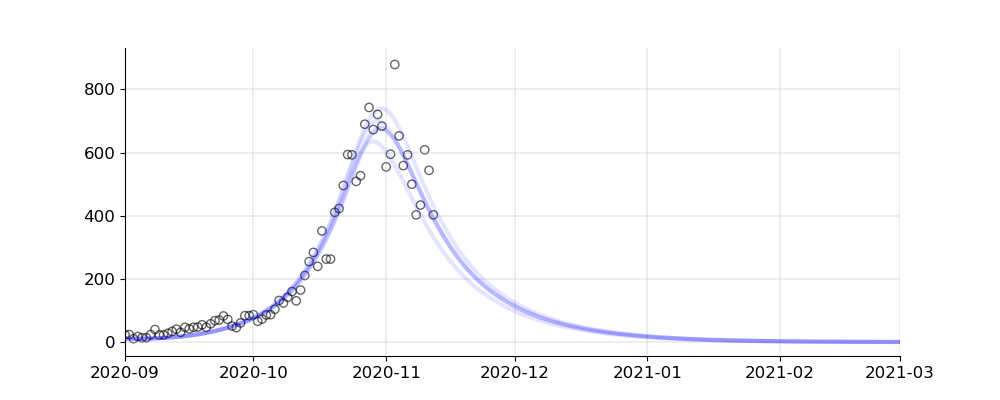

(737669.0, 737850.0)

In [18]:

fig,ax=plt.subplots(figsize=(10,4))
for i in range(5):
    # Sampling
    model_S1.parameters['beta'] = np.random.choice(samples_dict['beta'])
    idx,model_S1.parameters['l'] = random.choice(list(enumerate(samples_dict['l'])))
    model_S1.parameters['tau'] = samples_dict['tau'][idx]   
    # Simulate
    y_model_S1 = model_S1.sim(end_sim,start_date=start_calibration,warmup=0)
    # Plot
    ax.plot(y_model_S1['time'],y_model_S1["H_in"].sum(dim="Nc"),color='blue',alpha=0.1)

ax.scatter(df_sciensano[start_calibration:end_calibration].index,df_sciensano['H_in'][start_calibration:end_calibration],color='black',alpha=0.6,linestyle='None',facecolors='none')

#ax = _apply_tick_locator(ax)
ax.set_xlim(start_x,end_sim)

# Scenario F(ree): no lockdown

In [19]:
# Load the model parameters using `get_COVID19_SEIRD_parameters()`.
params = model_parameters.get_COVID19_SEIRD_parameters()

params.update({'df_google': df_google,
              'Nc_all' : Nc_all,
              'Nc_15min' : Nc_15min,
              'Nc_1hr' : Nc_1hr,
               'l' : 5,
               'tau' : 5,
               'prevention':0.5
              })

In [20]:
def no_lockdown(t,param,df_google, Nc_all, Nc_15min, Nc_1hr, l , tau, prevention):
    
    # Convert tau and l to dates
    tau_days = pd.Timedelta(tau, unit='D')
    l_days = pd.Timedelta(l, unit='D')

    # Define additional dates where intensity or school policy changes
    t5 = pd.Timestamp('2020-09-01') # september: lockdown relaxation narrative in newspapers reduces sense of urgency
    t6 = pd.Timestamp('2020-11-02') # autumn vacation
    t7 = pd.Timestamp('2020-11-09') # schools re-open
    t8 = pd.Timestamp('2020-12-18') # schools close
    t9 = pd.Timestamp('2021-01-04') # schools re-open

    # get mobility reductions
    if t <= df_google.index[-1]:
        row = -df_google[df_google.index == pd.Timestamp(t.date())]/100
    elif t > t6: # from November on: take same contact behaviour
        row=-df_google[df_google.index == t6]/100
    
    work=(1-row['work'].values)[0]
    transport=(1-row['transport'].values)[0]
    leisure=(1-row['retail_recreation'].values)[0]
    others=(1-row['grocery'].values)[0]

    # define policies

    if t5 < t <= t6:
        school = 1
        return (1/2.3)*Nc_15min['home'] + work*Nc_15min['work'] + school*Nc_15min['schools'] + transport*Nc_15min['transport'] + leisure*Nc_15min['leisure'] + others*Nc_15min['others']
    elif t6 < t <= t7:
        school = 0
        return (1/2.3)*Nc_15min['home'] + work*Nc_15min['work'] + school*Nc_15min['schools'] + transport*Nc_15min['transport'] + leisure*Nc_15min['leisure'] + others*Nc_15min['others']
    elif t7 < t <= t8:
        school = 1
        return (1/2.3)*Nc_15min['home'] + work*Nc_15min['work'] + school*Nc_15min['schools'] + transport*Nc_15min['transport'] + leisure*Nc_15min['leisure'] + others*Nc_15min['others']
    elif t8 < t <= t9:
        school = 0
        return (1/2.3)*Nc_15min['home'] + work*Nc_15min['work'] + school*Nc_15min['schools'] + transport*Nc_15min['transport'] + leisure*Nc_15min['leisure'] + others*Nc_15min['others']
    else:
        school = 1
        return (1/2.3)*Nc_15min['home'] + work*Nc_15min['work'] + school*Nc_15min['schools'] + transport*Nc_15min['transport'] + leisure*Nc_15min['leisure'] + others*Nc_15min['others']



In [21]:
# Initialize the model
model_F1 = models.COVID19_SEIRD(initial_states_sept, params, time_dependent_parameters={'Nc': no_lockdown})

<IPython.core.display.Javascript object>


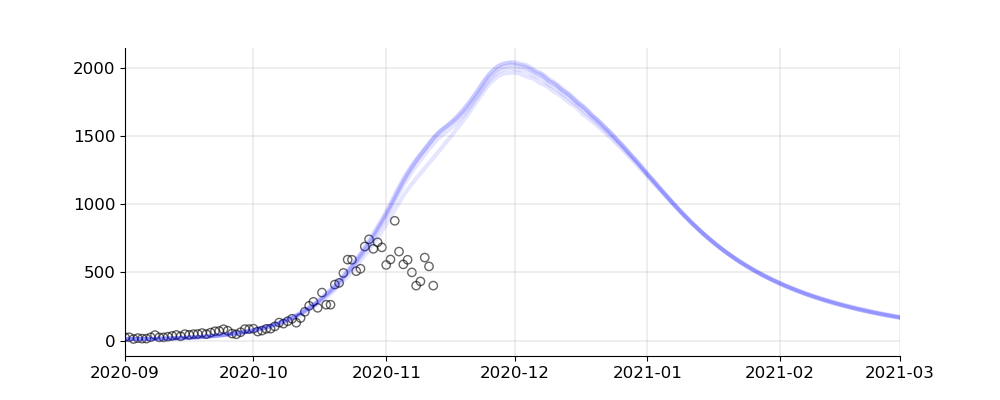

(737669.0, 737850.0)

In [22]:

fig,ax=plt.subplots(figsize=(10,4))
for i in range(5):
    # Sampling
    model_F1.parameters['beta'] = np.random.choice(samples_dict['beta'])
    idx,model_F1.parameters['l'] = random.choice(list(enumerate(samples_dict['l'])))
    model_F1.parameters['tau'] = samples_dict['tau'][idx]   
    # Simulate
    y_model_F1 = model_F1.sim(end_sim,start_date=start_calibration,warmup=0)
    # Plot
    ax.plot(y_model_F1['time'],y_model_F1["H_in"].sum(dim="Nc"),color='blue',alpha=0.1)

ax.scatter(df_sciensano[start_calibration:end_calibration].index,df_sciensano['H_in'][start_calibration:end_calibration],color='black',alpha=0.6,linestyle='None',facecolors='none')

ax.set_xlim('2020-09-01',end_sim)

# Functions

In [23]:
from math import floor

In [24]:
def vacc_policy(t, vaccN, daily, order):
    
    """
    t : timestamp
        current time in simulation
    vaccN : array
        population per age group to be vaccinated for effectiveness
    daily : int
        daily number of people vaccinated
    order : list
        ordered list of number 0 to 8, representing 9 age groups
    """
    
    vaccinations = np.array([0.0]*9)

    # Define additional dates where intensity or school policy changes
    t0 = pd.Timestamp('2020-09-01') # start vaccination
    t1 = t0 + pd.Timedelta(floor(vaccN[order[0]]/daily), unit='D') # end vaccination group 0
    t2 = t1 + pd.Timedelta(floor(vaccN[order[1]]/daily), unit='D') # end vaccination group 1
    t3 = t2 + pd.Timedelta(floor(vaccN[order[2]]/daily), unit='D') 
    t4 = t3 + pd.Timedelta(floor(vaccN[order[3]]/daily), unit='D') 
    t5 = t4 + pd.Timedelta(floor(vaccN[order[4]]/daily), unit='D')
    t6 = t5 + pd.Timedelta(floor(vaccN[order[5]]/daily), unit='D') 
    t7 = t6 + pd.Timedelta(floor(vaccN[order[6]]/daily), unit='D') 
    t8 = t7 + pd.Timedelta(floor(vaccN[order[7]]/daily), unit='D') 
    t9 = t8 + pd.Timedelta(floor(vaccN[order[8]]/daily), unit='D') # end vaccination group 8

    if t < t1:
        vaccinations[order[0]] = daily/vaccN[order[0]]
        return vaccinations
    
    if t < t2:
        vaccinations[order[1]] = daily/vaccN[order[1]]
        return vaccinations
    
    if t < t3:
        vaccinations[order[2]] = daily/vaccN[order[2]]
        return vaccinations
    
    if t < t4:
        vaccinations[order[3]] = daily/vaccN[order[3]]
        return vaccinations
    
    if t < t5:
        vaccinations[order[4]] = daily/vaccN[order[4]]
        return vaccinations
    
    if t < t6:
        vaccinations[order[5]] = daily/vaccN[order[5]]
        return vaccinations
    
    if t < t7:
        vaccinations[order[6]] = daily/vaccN[order[6]]
        return vaccinations
    
    if t < t8:
        vaccinations[order[7]] = daily/vaccN[order[7]]
        return vaccinations
    
    else:
        vaccinations[order[8]] = daily/vaccN[order[8]]
        return vaccinations
    

In [25]:
def calc_vaccN(suscN, expN, recN, vaccinated_prop, order, effectivity):
    
    """
    Parameters
    ----------
    
    suscN : array
        numbers of susceptibles per age group
    expN : array
        numbers of exposed per age group
    recN : array
        numbers of recovered per age group
    vaccinated_prop: float
        proportion of the population already vaccinated (following the same strategy as further implemented)
    order : list
        ordered list of number 0 to 8, representing 9 age groups  
       
    Returns
    ------
    
    vaccN : array
        numbers of people to vaccinate per age group
    new_suscN : array
        numbers of remaining susceptibles per age group, taking effectivity into account
    new_expN : array
        numbers of remaining exposed per age group, taking effectivity into account
    new_recN : array
        numbers of resulting recovered per age group
    """

    vaccN = suscN.copy()
    new_suscN = suscN.copy()
    new_expN = expN.copy()
    
    # every person who is vaccinated is considered immune, hence leaves vaccN
    vaccinated = np.sum(suscN)*vaccinated_prop
    for i in order:
        left_in_i = suscN[i] - vaccinated
        vaccinated = max(0,(vaccinated - suscN[i]))
        vaccN[i] =  max(0,left_in_i)
        
    # in reality, only a proportion of the vaccinated people are not susceptible anymore
    real_vaccinated = np.sum(suscN)*vaccinated_prop*effectivity
    for i in order:
        left_in_i = suscN[i] - real_vaccinated
        real_vaccinated = max(0,(real_vaccinated - suscN[i]))
        new_suscN[i] =  max(0,left_in_i)
        
    # we suppose that in the exposed pool, a proportional number of people cannot be infected anymore
#     real_vaccinated = np.sum(expN)*vaccinated_prop*effectivity
#     for i in order:
#         left_in_i = expN[i] - real_vaccinated
#         real_vaccinated = max(0,(real_vaccinated - expN[i]))
#         new_expN[i] =  max(0,left_in_i)
        
    susc_to_rec = suscN - new_suscN
    exp_to_rec = expN - new_expN
    new_recN = recN + susc_to_rec + exp_to_rec
        
    return vaccN, new_suscN, new_expN, new_recN

In [26]:
def vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_no_vacc, levels=levels, tdep_fun=google_lockdown):
    suscN = np.array(initial_states_no_vacc['S'])
    expN = np.array(initial_states_no_vacc['E'])
    recN = np.array(initial_states_no_vacc['R'])
    new_vaccN, new_suscN, new_expN, new_recN = calc_vaccN(suscN, expN, recN, vaccinated_prop, order, effectivity)
    params.update({'vaccN' : new_vaccN,
                   'daily' : daily,
                   'order' : order,
                   'e' : np.array([effectivity]*levels)
                 })
    # Adapt initial states
    initial_states = initial_states_no_vacc.copy()
    initial_states.update({'S' : new_suscN,
                           'E' : new_expN,
                           'R' : new_recN})
    return models.COVID19_SEIRD(initial_states, params, time_dependent_parameters={'Nc': tdep_fun,
                                                                                   'v':vacc_policy})

In [71]:
def plot_band(ax, y_model, var, color, label):
    ax.fill_between(pd.to_datetime(y_model['time'].values),y_model[var].quantile(LL,dim="draws").sum(dim="Nc"), 
                    y_model[var].quantile(UL,dim="draws").sum(dim="Nc"),alpha=0.30, facecolor = color)
    ax.plot(y_model['time'],y_model[var].mean(dim="draws").sum(dim="Nc"), color=color, label=label, lw=2)
    return

In [72]:
def plot_band_age(ax, y_model, age_group, var, color, label):
    ax.fill_between(pd.to_datetime(y_model['time'].values),y_model[var].quantile(LL,dim="draws").sel(Nc=age_group), 
                    y_model[var].quantile(UL,dim="draws").sel(Nc=age_group),alpha=0.30, facecolor = color)
    ax.plot(y_model['time'],y_model[var].mean(dim="draws").sel(Nc=age_group), color=color, label=label, lw=2)
    return

# Try-out functions

In [ ]:
# def vacc_policy_old_to_young(t, initN, daily):
    
#     vacc_level = 0.75
#     vaccN = initN*vacc_level

#     # Define additional dates where intensity or school policy changes
#     t1 = pd.Timestamp('2020-09-01') # start vaccination 80+
#     t2 = t1 + pd.Timedelta(floor(vaccN[7]/daily), unit='D') # start vaccination 70+
#     t3 = t2 + pd.Timedelta(floor(vaccN[8]/daily), unit='D') # start vacciation 60+
#     t4 = t3 + pd.Timedelta(floor(vaccN[6]/daily), unit='D') # start vacciation 50+
#     t5 = t4 + pd.Timedelta(floor(vaccN[5]/daily), unit='D') # start vacciation 40+
#     t6 = t5 + pd.Timedelta(floor(vaccN[4]/daily), unit='D') # start vacciation 30+

    
#     vaccinations = {'0-9':0,
#                     '10-19':0,
#                     '20-29':0,
#                     '30-39':0,
#                     '40-49':0,
#                     '50-59':0,
#                     '60-69':0,
#                     '70-79':0,
#                     '80+':0}
#     if t < t2:
#         vaccinations.update({'70-79':daily/vaccN[7]})
#         return [value for key, value in vaccinations.items()]
#     elif t < t3:
#         vaccinations.update({'80+':daily/vaccN[8]})
#         return [value for key, value in vaccinations.items()]
#     elif t < t4:
#         vaccinations.update({'60-69':daily/vaccN[6]})
#         return [value for key, value in vaccinations.items()]
#     elif t < t5:
#         vaccinations.update({'50-59':daily/vaccN[5]})
#         return [value for key, value in vaccinations.items()]
#     elif t < t6:
#         vaccinations.update({'40-49':daily/vaccN[4]})
#         return [value for key, value in vaccinations.items()]
#     else:
#         vaccinations.update({'30-39':daily/vaccN[3]})
#         return [value for key, value in vaccinations.items()]

In [ ]:
# times = pd.date_range(start='2020-09-01', freq='D', end='2021-01-01')
# for t in times:
#     v = vacc_policy_old_to_young(t, initN, 10000)
#     print(v)

In [ ]:
# for t in times:
#     v = vacc_policy(t, initN, 10000, order = [7,8,6,5,4,3,2,1,0])
#     print(v)

In [ ]:
# def vacc_policy(t, initN, daily, order):
    
#     vaccinations = [0]*9
#     vacc_level = 0.75
#     vaccN = initN*vacc_level

#     vacc_df = pd.DataFrame({'age_group':np.arange(0,9)})
#     vacc_df['v'] = vacc_df.age_group.apply(lambda x: daily/vaccN[x])
#     vacc_df['end_time'] = None
    
#     end_times = {}
#     end_times[0] = pd.Timestamp('2020-09-01')
    
#     for i in np.arange(1,len(order)+1):
#         end_times[i] = end_times[i-1] + pd.Timedelta(floor(vaccN[order[i-1]]/daily), unit='D')
#         vacc_df.loc[vacc_dc.age_group==order[i-1],'end_time'] = end_times[i]
    
#     v = vacc_df[t<vacc_df.end_time].sort_values(by='end_time').iloc[0]['v']
#     age = vacc_df[t<vacc_df.end_time].sort_values(by='end_time').iloc[0]['age_group']

#     vaccinations[int(age)] = v
    
#     return vaccinations

# Scenarios S(trict)

## Scenario S2: Vaccination old to young, eff=0.7

In [28]:
order = [8,7,6,5,4,3,2,1,0]
effectivity = 0.7
daily=10000

In [29]:
vaccinated_prop = 0
model_S2a = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept)
vaccinated_prop = 0.1
model_S2b = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept)
vaccinated_prop = 0.3
model_S2c = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept)
vaccinated_prop = 0.5
model_S2d = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept)

In [31]:
y_model_S2a = model_S2a.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S2b = model_S2b.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S2c = model_S2c.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S2d = model_S2d.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S1 = model_S1.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)

In [ ]:
# fig,ax = plt.subplots()
# y_model_S1['E'].sum(dim='Nc'). plot(ax=ax, c='green', label='no vacc')
# y_model_S2a['E'].sum(dim='Nc'). plot(ax=ax, c='blue', label='S2a')
# plt.legend()

## Scenario S3: First the most interactive, eff=0.7

In [86]:
# Which age group has most contacts with all other age groups?
Nc_total.sum(axis=1)

array([15.72735851, 20.8584876 , 20.60254222, 23.26610461, 22.28518951,
       17.62285137, 10.91363765,  8.23214594,  6.93103738])

In [88]:
order = list(contact_sums.sort_values('contacts', ascending=False).age_group)
effectivity = 0.7
daily=10000

In [89]:
order

[3, 4, 1, 2, 5, 0, 6, 7, 8]

In [34]:
vaccinated_prop = 0
model_S3a = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept)
vaccinated_prop = 0.1
model_S3b = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept)
vaccinated_prop = 0.3
model_S3c = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept)
vaccinated_prop = 0.5
model_S3d = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept)

In [35]:
y_model_S3a = model_S3a.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S3b = model_S3b.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S3c = model_S3c.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S3d = model_S3d.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S1 = model_S1.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)

## Scenario S4: Vaccination old to young, eff=0.9

In [36]:
order = [8,7,6,5,4,3,2,1,0]
effectivity = 0.9
daily=10000

In [37]:
vaccinated_prop = 0
model_S4a = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept)
vaccinated_prop = 0.1
model_S4b = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept)
vaccinated_prop = 0.3
model_S4c = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept)
vaccinated_prop = 0.5
model_S4d = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept)

In [38]:
y_model_S4a = model_S4a.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S4b = model_S4b.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S4c = model_S4c.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S4d = model_S4d.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S1 = model_S1.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)

## Scenario S5: First the most mobile, eff=0.9

In [39]:
order = [2,3,4,5,6,7,8,1,0]
effectivity = 0.9
daily=10000

In [40]:
vaccinated_prop = 0
model_S5a = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept)
vaccinated_prop = 0.1
model_S5b = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept)
vaccinated_prop = 0.3
model_S5c = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept)
vaccinated_prop = 0.5
model_S5d = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept)

In [41]:
y_model_S5a = model_S5a.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S5b = model_S5b.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S5c = model_S5c.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S5d = model_S5d.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S1 = model_S1.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)

# Figures lockdown-case S

<IPython.core.display.Javascript object>


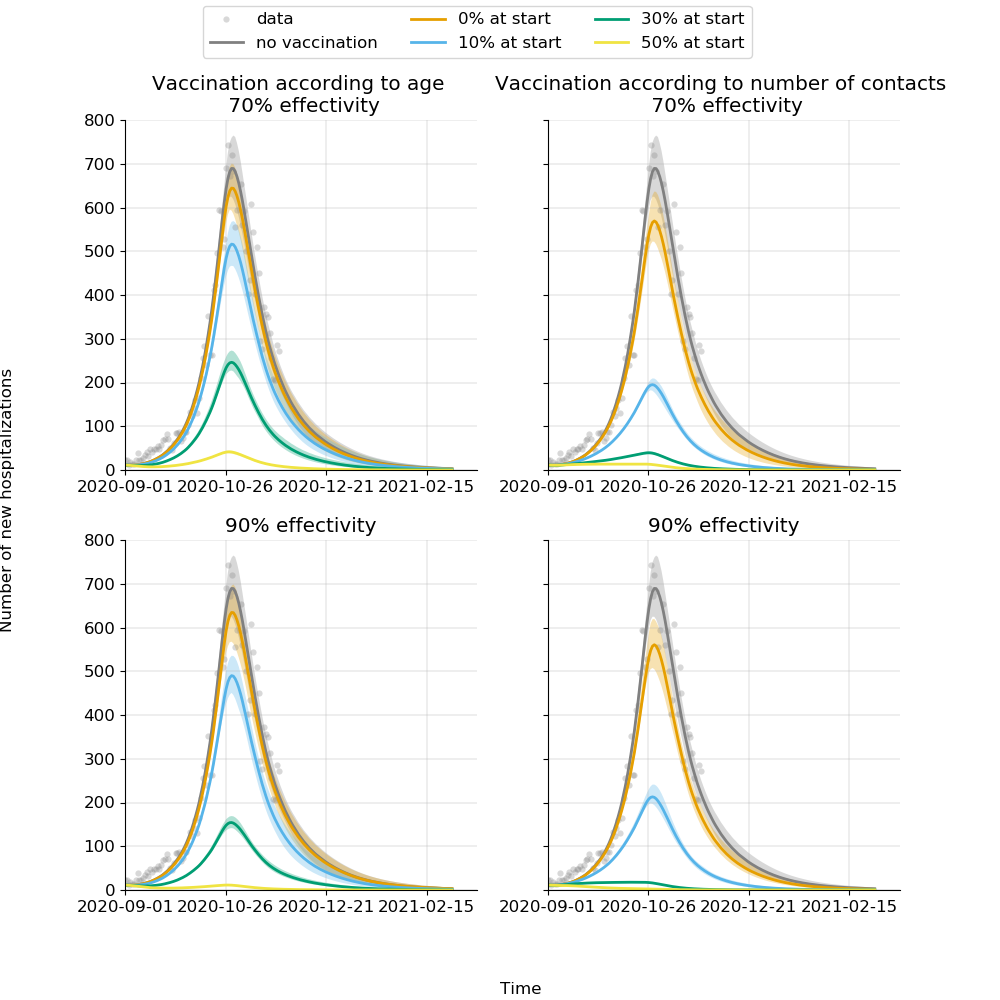

In [80]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize=(10,10), nrows=2, ncols=2, sharex=True, sharey=True)
ax1.plot('DATE','H_in',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
         c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band(ax1, y_model_S1, 'H_in', 'gray', 'no vaccination')
plot_band(ax1, y_model_S2a, 'H_in', 'C0', '0% at start')
plot_band(ax1, y_model_S2b, 'H_in', 'C1', '10% at start')
plot_band(ax1, y_model_S2c, 'H_in', 'C2', '30% at start')
plot_band(ax1, y_model_S2d, 'H_in', 'C3', '50% at start')

ax1.set_xlim(start_x, end_x)
ax1.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax1.xaxis.set_tick_params(which='both', labelbottom=True)
ax1.set_title('Vaccination according to age \n 70% effectivity')


ax2.plot('DATE','H_in',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
         c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band(ax2, y_model_S1, 'H_in', 'gray', 'no vaccination')
plot_band(ax2, y_model_S3a, 'H_in', 'C0', '0% at start')
plot_band(ax2, y_model_S3b, 'H_in', 'C1', '10% at start')
plot_band(ax2, y_model_S3c, 'H_in', 'C2', '30% at start')
plot_band(ax2, y_model_S3d, 'H_in', 'C3', '50% at start')

ax2.set_xlim(start_x, end_x)
ax2.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax2.xaxis.set_tick_params(which='both', labelbottom=True)
ax2.set_title('Vaccination according to number of contacts \n 70% effectivity')


ax3.plot('DATE','H_in',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
         c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band(ax3, y_model_S1, 'H_in', 'gray', 'no vaccination')
plot_band(ax3, y_model_S4a, 'H_in', 'C0', '0% at start')
plot_band(ax3, y_model_S4b, 'H_in', 'C1', '10% at start')
plot_band(ax3, y_model_S4c, 'H_in', 'C2', '30% at start')
plot_band(ax3, y_model_S4d, 'H_in', 'C3', '50% at start')

ax3.set_xlim(start_x, end_x)
ax3.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax3.xaxis.set_tick_params(which='both', labelbottom=True)
ax3.set_title('90% effectivity')

ax4.plot('DATE','H_in',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
         c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band(ax4, y_model_S1, 'H_in', 'gray', 'no vaccination')
plot_band(ax4, y_model_S5a, 'H_in', 'C0', '0% at start')
plot_band(ax4, y_model_S5b, 'H_in', 'C1', '10% at start')
plot_band(ax4, y_model_S5c, 'H_in', 'C2', '30% at start')
plot_band(ax4, y_model_S5d, 'H_in', 'C3', '50% at start')

ax4.set_xlim(start_x, end_x)
ax4.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax4.xaxis.set_tick_params(which='both', labelbottom=True)
ax4.set_title('90% effectivity')


ax1.legend(loc='upper center', bbox_to_anchor=(1, 1.35), ncol=3)
ax1.set_ylim(0,800)
fig.text(0, 0.5, 'Number of new hospitalizations', va='center', rotation='vertical')
fig.text(0.5, 0.01, 'Time', va='center', rotation='horizontal')


fig.savefig('../results/predictions/national/vaccination_wave2_hosp_current_measures.pdf')

<IPython.core.display.Javascript object>


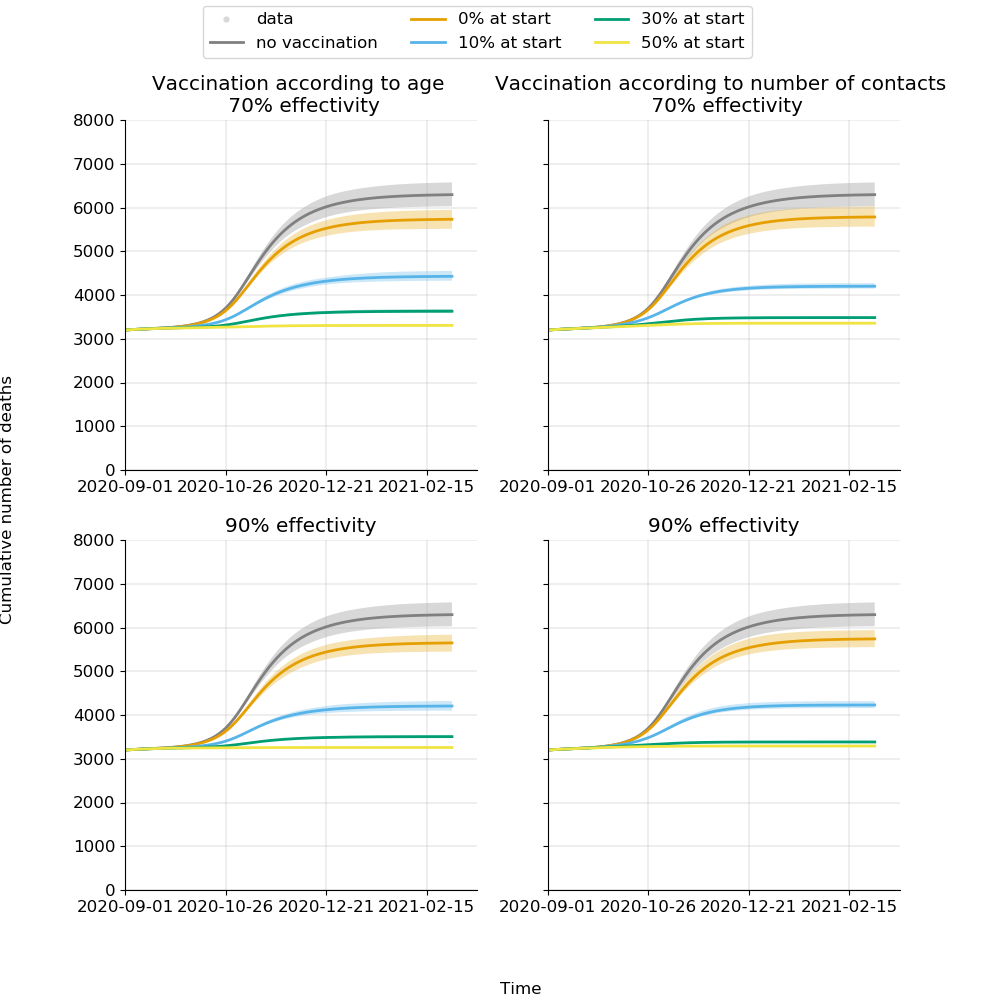

In [81]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize=(10,10), nrows=2, ncols=2, sharex=True, sharey=True)
ax1.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
         c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band(ax1, y_model_S1, 'D', 'gray', 'no vaccination')
plot_band(ax1, y_model_S2a, 'D', 'C0', '0% at start')
plot_band(ax1, y_model_S2b, 'D', 'C1', '10% at start')
plot_band(ax1, y_model_S2c, 'D', 'C2', '30% at start')
plot_band(ax1, y_model_S2d, 'D', 'C3', '50% at start')

ax1.set_xlim(start_x, end_x)
ax1.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax1.xaxis.set_tick_params(which='both', labelbottom=True)
ax1.set_title('Vaccination according to age \n 70% effectivity')


ax2.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
         c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band(ax2, y_model_S1, 'D', 'gray', 'no vaccination')
plot_band(ax2, y_model_S3a, 'D', 'C0', '0% at start')
plot_band(ax2, y_model_S3b, 'D', 'C1', '10% at start')
plot_band(ax2, y_model_S3c, 'D', 'C2', '30% at start')
plot_band(ax2, y_model_S3d, 'D', 'C3', '50% at start')

ax2.set_xlim(start_x, end_x)
ax2.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax2.xaxis.set_tick_params(which='both', labelbottom=True)
ax2.set_title('Vaccination according to number of contacts \n 70% effectivity')


ax3.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
         c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band(ax3, y_model_S1, 'D', 'gray', 'no vaccination')
plot_band(ax3, y_model_S4a, 'D', 'C0', '0% at start')
plot_band(ax3, y_model_S4b, 'D', 'C1', '10% at start')
plot_band(ax3, y_model_S4c, 'D', 'C2', '30% at start')
plot_band(ax3, y_model_S4d, 'D', 'C3', '50% at start')

ax3.set_xlim(start_x, end_x)
ax3.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax3.xaxis.set_tick_params(which='both', labelbottom=True)
ax3.set_title('90% effectivity')

ax4.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
         c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band(ax4, y_model_S1, 'D', 'gray', 'no vaccination')
plot_band(ax4, y_model_S5a, 'D', 'C0', '0% at start')
plot_band(ax4, y_model_S5b, 'D', 'C1', '10% at start')
plot_band(ax4, y_model_S5c, 'D', 'C2', '30% at start')
plot_band(ax4, y_model_S5d, 'D', 'C3', '50% at start')

ax4.set_xlim(start_x, end_x)
ax4.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax4.xaxis.set_tick_params(which='both', labelbottom=True)
ax4.set_title('90% effectivity')


ax1.legend(loc='upper center', bbox_to_anchor=(1, 1.35), ncol=3)
ax1.set_ylim(0,8000)
fig.text(0, 0.5, 'Cumulative number of deaths', va='center', rotation='vertical')
fig.text(0.5, 0.01, 'Time', va='center', rotation='horizontal')


fig.savefig('../results/predictions/national/vaccination_wave2_deaths_current_measures.pdf')

# Scenarios F(ree)

## Scenario F2: Vaccination old to young, eff=0.7

In [44]:
order = [8,7,6,5,4,3,2,1,0]
effectivity = 0.7
daily=10000

In [45]:
vaccinated_prop = 0
model_F2a = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)
vaccinated_prop = 0.1
model_F2b = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)
vaccinated_prop = 0.3
model_F2c = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)
vaccinated_prop = 0.5
model_F2d = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)

In [46]:
y_model_F2a = model_F2a.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F2b = model_F2b.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F2c = model_F2c.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F2d = model_F2d.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F1 = model_F1.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)

In [ ]:
# fig,ax = plt.subplots()
# y_model_F1['E'].sum(dim='Nc').sum(dim='draws'). plot(ax=ax, c='green', label='no vacc')
# y_model_F2a['E'].sum(dim='Nc').sum(dim='draws'). plot(ax=ax, c='blue', label='S2a')
# plt.legend()

## Scenario F3: First the most interactive, eff=0.7

In [ ]:
# Which age group has most contacts with all other age groups?
Nc_total.sum(axis=1)

In [47]:
contact_sums = pd.DataFrame({'contacts':Nc_total.sum(axis=1), 'age_group':range(9)})

In [48]:
order = list(contact_sums.sort_values('contacts', ascending=False).age_group)
effectivity = 0.7
daily=10000

In [49]:
vaccinated_prop = 0
model_F3a = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)
vaccinated_prop = 0.1
model_F3b = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)
vaccinated_prop = 0.3
model_F3c = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)
vaccinated_prop = 0.5
model_F3d = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)

In [50]:
y_model_F3a = model_F3a.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F3b = model_F3b.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F3c = model_F3c.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F3d = model_F3d.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F1 = model_F1.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)

## Scenario F4: Vaccination old to young, eff=0.9

In [51]:
order = [8,7,6,5,4,3,2,1,0]
effectivity = 0.9
daily=10000

In [52]:
vaccinated_prop = 0
model_F4a = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)
vaccinated_prop = 0.1
model_F4b = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)
vaccinated_prop = 0.3
model_F4c = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)
vaccinated_prop = 0.5
model_F4d = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)

In [53]:
y_model_F4a = model_F4a.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F4b = model_F4b.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F4c = model_F4c.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F4d = model_F4d.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F1 = model_F1.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)

## Scenario F5: First the most mobile, eff=0.9

In [54]:
order = [2,3,4,5,6,7,8,1,0]
effectivity = 0.9
daily=10000

In [55]:
vaccinated_prop = 0
model_F5a = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)
vaccinated_prop = 0.1
model_F5b = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)
vaccinated_prop = 0.3
model_F5c = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)
vaccinated_prop = 0.5
model_F5d = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)

In [56]:
y_model_F5a = model_F5a.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F5b = model_F5b.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F5c = model_F5c.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F5d = model_F5d.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F1 = model_F1.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)

# Figures free-case F

<IPython.core.display.Javascript object>


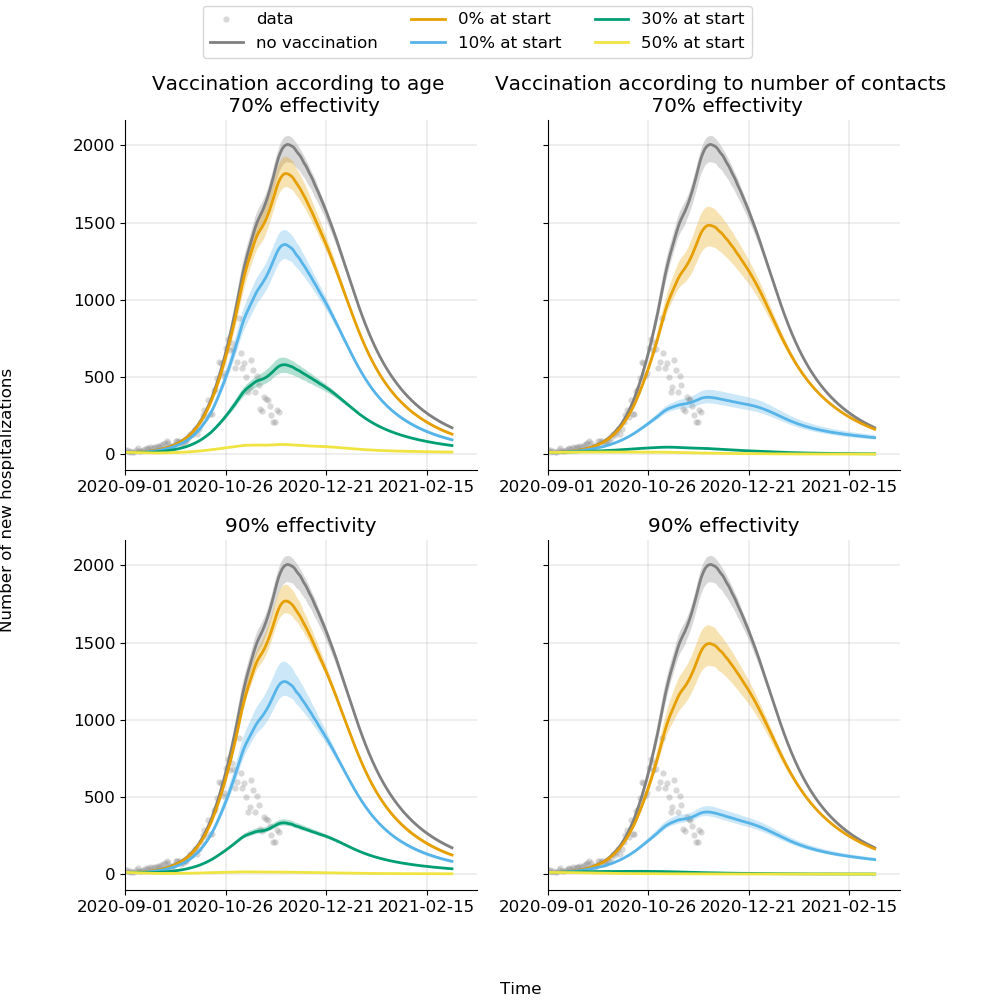

In [82]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize=(10,10), nrows=2, ncols=2, sharex=True, sharey=True)
ax1.plot('DATE','H_in',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
         c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band(ax1, y_model_F1, 'H_in', 'gray', 'no vaccination')
plot_band(ax1, y_model_F2a, 'H_in', 'C0', '0% at start')
plot_band(ax1, y_model_F2b, 'H_in', 'C1', '10% at start')
plot_band(ax1, y_model_F2c, 'H_in', 'C2', '30% at start')
plot_band(ax1, y_model_F2d, 'H_in', 'C3', '50% at start')

ax1.set_xlim(start_x, end_x)
ax1.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax1.xaxis.set_tick_params(which='both', labelbottom=True)
ax1.set_title('Vaccination according to age \n 70% effectivity')


ax2.plot('DATE','H_in',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
         c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band(ax2, y_model_F1, 'H_in', 'gray', 'no vaccination')
plot_band(ax2, y_model_F3a, 'H_in', 'C0', '0% at start')
plot_band(ax2, y_model_F3b, 'H_in', 'C1', '10% at start')
plot_band(ax2, y_model_F3c, 'H_in', 'C2', '30% at start')
plot_band(ax2, y_model_F3d, 'H_in', 'C3', '50% at start')

ax2.set_xlim(start_x, end_x)
ax2.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax2.xaxis.set_tick_params(which='both', labelbottom=True)
ax2.set_title('Vaccination according to number of contacts \n 70% effectivity')


ax3.plot('DATE','H_in',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
         c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band(ax3, y_model_F1, 'H_in', 'gray', 'no vaccination')
plot_band(ax3, y_model_F4a, 'H_in', 'C0', '0% at start')
plot_band(ax3, y_model_F4b, 'H_in', 'C1', '10% at start')
plot_band(ax3, y_model_F4c, 'H_in', 'C2', '30% at start')
plot_band(ax3, y_model_F4d, 'H_in', 'C3', '50% at start')

ax3.set_xlim(start_x, end_x)
ax3.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax3.xaxis.set_tick_params(which='both', labelbottom=True)
ax3.set_title('90% effectivity')

ax4.plot('DATE','H_in',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
         c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band(ax4, y_model_F1, 'H_in', 'gray', 'no vaccination')
plot_band(ax4, y_model_F5a, 'H_in', 'C0', '0% at start')
plot_band(ax4, y_model_F5b, 'H_in', 'C1', '10% at start')
plot_band(ax4, y_model_F5c, 'H_in', 'C2', '30% at start')
plot_band(ax4, y_model_F5d, 'H_in', 'C3', '50% at start')

ax4.set_xlim(start_x, end_x)
ax4.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax4.xaxis.set_tick_params(which='both', labelbottom=True)
ax4.set_title('90% effectivity')


ax1.legend(loc='upper center', bbox_to_anchor=(1, 1.35), ncol=3)
#ax1.set_ylim(0,800)
fig.text(0, 0.5, 'Number of new hospitalizations', va='center', rotation='vertical')
fig.text(0.5, 0.01, 'Time', va='center', rotation='horizontal')


fig.savefig('../results/predictions/national/vaccination_wave2_hosp_no_measures.pdf')

<IPython.core.display.Javascript object>


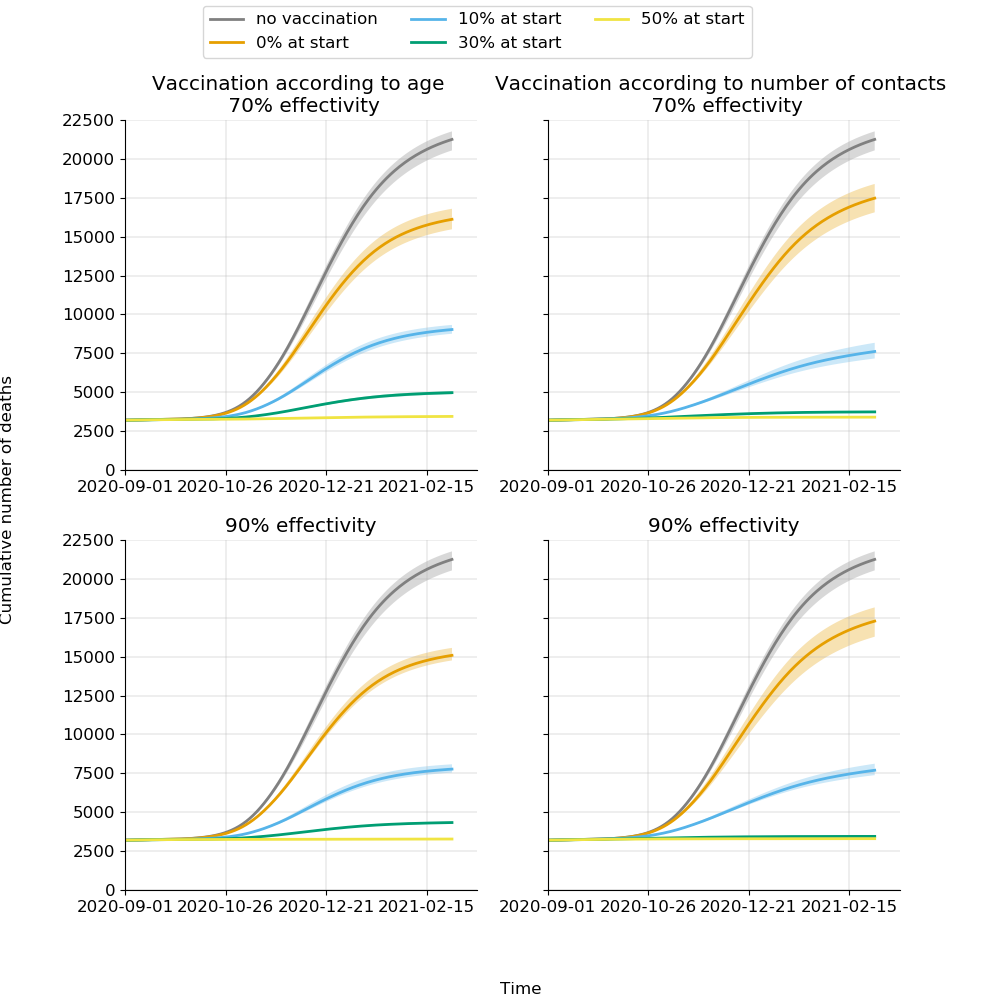

In [83]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize=(10,10), nrows=2, ncols=2, sharex=True, sharey=True)
# ax1.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
#          c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band(ax1, y_model_F1, 'D', 'gray', 'no vaccination')
plot_band(ax1, y_model_F2a, 'D', 'C0', '0% at start')
plot_band(ax1, y_model_F2b, 'D', 'C1', '10% at start')
plot_band(ax1, y_model_F2c, 'D', 'C2', '30% at start')
plot_band(ax1, y_model_F2d, 'D', 'C3', '50% at start')

ax1.set_xlim(start_x, end_x)
ax1.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax1.xaxis.set_tick_params(which='both', labelbottom=True)
ax1.set_title('Vaccination according to age \n 70% effectivity')


# ax2.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
#          c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band(ax2, y_model_F1, 'D', 'gray', 'no vaccination')
plot_band(ax2, y_model_F3a, 'D', 'C0', '0% at start')
plot_band(ax2, y_model_F3b, 'D', 'C1', '10% at start')
plot_band(ax2, y_model_F3c, 'D', 'C2', '30% at start')
plot_band(ax2, y_model_F3d, 'D', 'C3', '50% at start')

ax2.set_xlim(start_x, end_x)
ax2.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax2.xaxis.set_tick_params(which='both', labelbottom=True)
ax2.set_title('Vaccination according to number of contacts \n 70% effectivity')


# ax3.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
#          c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band(ax3, y_model_F1, 'D', 'gray', 'no vaccination')
plot_band(ax3, y_model_F4a, 'D', 'C0', '0% at start')
plot_band(ax3, y_model_F4b, 'D', 'C1', '10% at start')
plot_band(ax3, y_model_F4c, 'D', 'C2', '30% at start')
plot_band(ax3, y_model_F4d, 'D', 'C3', '50% at start')

ax3.set_xlim(start_x, end_x)
ax3.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax3.xaxis.set_tick_params(which='both', labelbottom=True)
ax3.set_title('90% effectivity')

# ax4.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
#          c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band(ax4, y_model_F1, 'D', 'gray', 'no vaccination')
plot_band(ax4, y_model_F5a, 'D', 'C0', '0% at start')
plot_band(ax4, y_model_F5b, 'D', 'C1', '10% at start')
plot_band(ax4, y_model_F5c, 'D', 'C2', '30% at start')
plot_band(ax4, y_model_F5d, 'D', 'C3', '50% at start')

ax4.set_xlim(start_x, end_x)
ax4.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax4.xaxis.set_tick_params(which='both', labelbottom=True)
ax4.set_title('90% effectivity')


ax1.legend(loc='upper center', bbox_to_anchor=(1, 1.35), ncol=3)
ax1.set_ylim(0,22500)
fig.text(0, 0.5, 'Cumulative number of deaths', va='center', rotation='vertical')
fig.text(0.5, 0.01, 'Time', va='center', rotation='horizontal')


fig.savefig('../results/predictions/national/vaccination_wave2_deaths_no_measures.pdf')

<IPython.core.display.Javascript object>


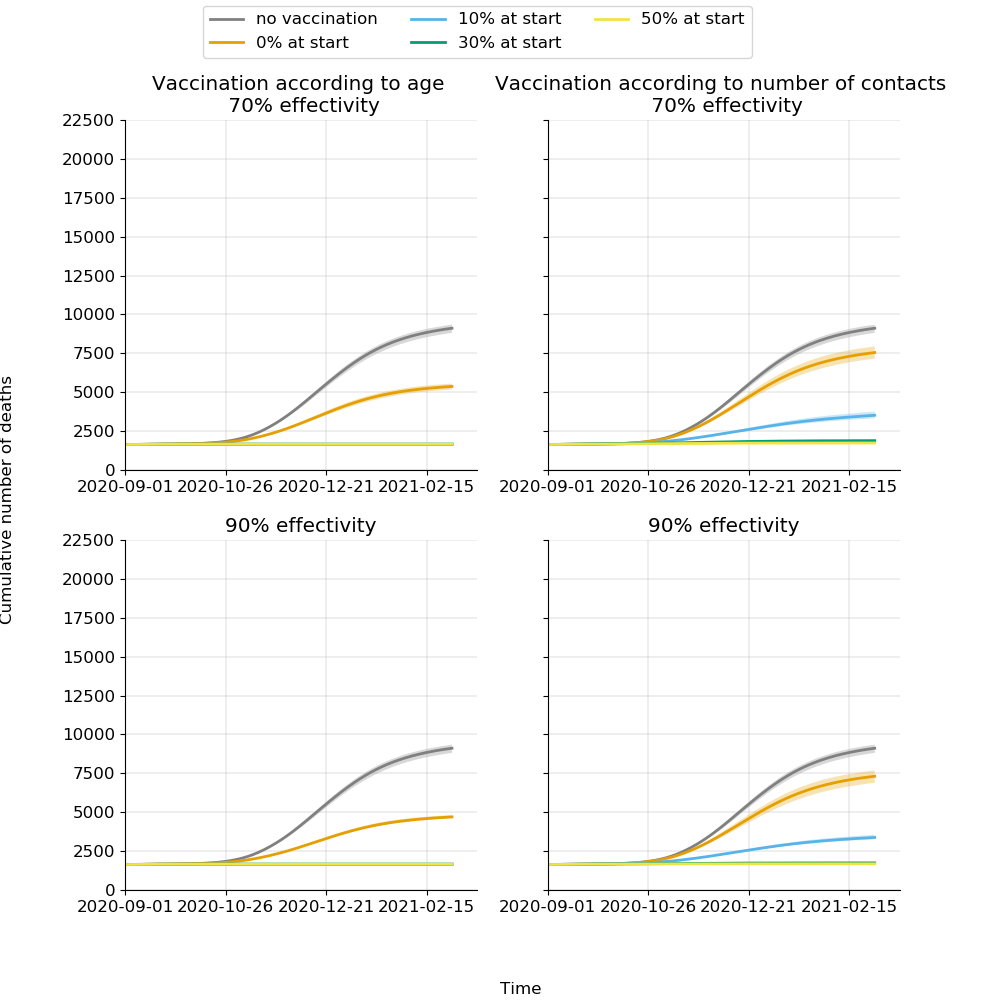

In [84]:
age_group = 8
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize=(10,10), nrows=2, ncols=2, sharex=True, sharey=True)
# ax1.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
#          c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band_age(ax1, y_model_F1, age_group, 'D', 'gray', 'no vaccination')
plot_band_age(ax1, y_model_F2a, age_group, 'D', 'C0', '0% at start')
plot_band_age(ax1, y_model_F2b, age_group, 'D', 'C1', '10% at start')
plot_band_age(ax1, y_model_F2c, age_group, 'D', 'C2', '30% at start')
plot_band_age(ax1, y_model_F2d, age_group, 'D', 'C3', '50% at start')

ax1.set_xlim(start_x, end_x)
ax1.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax1.xaxis.set_tick_params(which='both', labelbottom=True)
ax1.set_title('Vaccination according to age \n 70% effectivity')


# ax2.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
#          c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band_age(ax2, y_model_F1, age_group, 'D', 'gray', 'no vaccination')
plot_band_age(ax2, y_model_F3a, age_group, 'D', 'C0', '0% at start')
plot_band_age(ax2, y_model_F3b, age_group, 'D', 'C1', '10% at start')
plot_band_age(ax2, y_model_F3c, age_group, 'D', 'C2', '30% at start')
plot_band_age(ax2, y_model_F3d, age_group, 'D', 'C3', '50% at start')

ax2.set_xlim(start_x, end_x)
ax2.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax2.xaxis.set_tick_params(which='both', labelbottom=True)
ax2.set_title('Vaccination according to number of contacts \n 70% effectivity')


# ax3.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
#          c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band_age(ax3, y_model_F1, age_group, 'D', 'gray', 'no vaccination')
plot_band_age(ax3, y_model_F4a, age_group, 'D', 'C0', '0% at start')
plot_band_age(ax3, y_model_F4b, age_group, 'D', 'C1', '10% at start')
plot_band_age(ax3, y_model_F4c, age_group, 'D', 'C2', '30% at start')
plot_band_age(ax3, y_model_F4d, age_group, 'D', 'C3', '50% at start')

ax3.set_xlim(start_x, end_x)
ax3.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax3.xaxis.set_tick_params(which='both', labelbottom=True)
ax3.set_title('90% effectivity')

# ax4.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
#          c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band_age(ax4, y_model_F1, age_group, 'D', 'gray', 'no vaccination')
plot_band_age(ax4, y_model_F5a, age_group, 'D', 'C0', '0% at start')
plot_band_age(ax4, y_model_F5b, age_group, 'D', 'C1', '10% at start')
plot_band_age(ax4, y_model_F5c, age_group, 'D', 'C2', '30% at start')
plot_band_age(ax4, y_model_F5d, age_group, 'D', 'C3', '50% at start')

ax4.set_xlim(start_x, end_x)
ax4.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax4.xaxis.set_tick_params(which='both', labelbottom=True)
ax4.set_title('90% effectivity')


ax1.legend(loc='upper center', bbox_to_anchor=(1, 1.35), ncol=3)
ax1.set_ylim(0,22500)
fig.text(0, 0.5, 'Cumulative number of deaths', va='center', rotation='vertical')
fig.text(0.5, 0.01, 'Time', va='center', rotation='horizontal')


fig.savefig('../results/predictions/national/vaccination_wave2_deaths_no_measures_age80+.pdf')

<IPython.core.display.Javascript object>


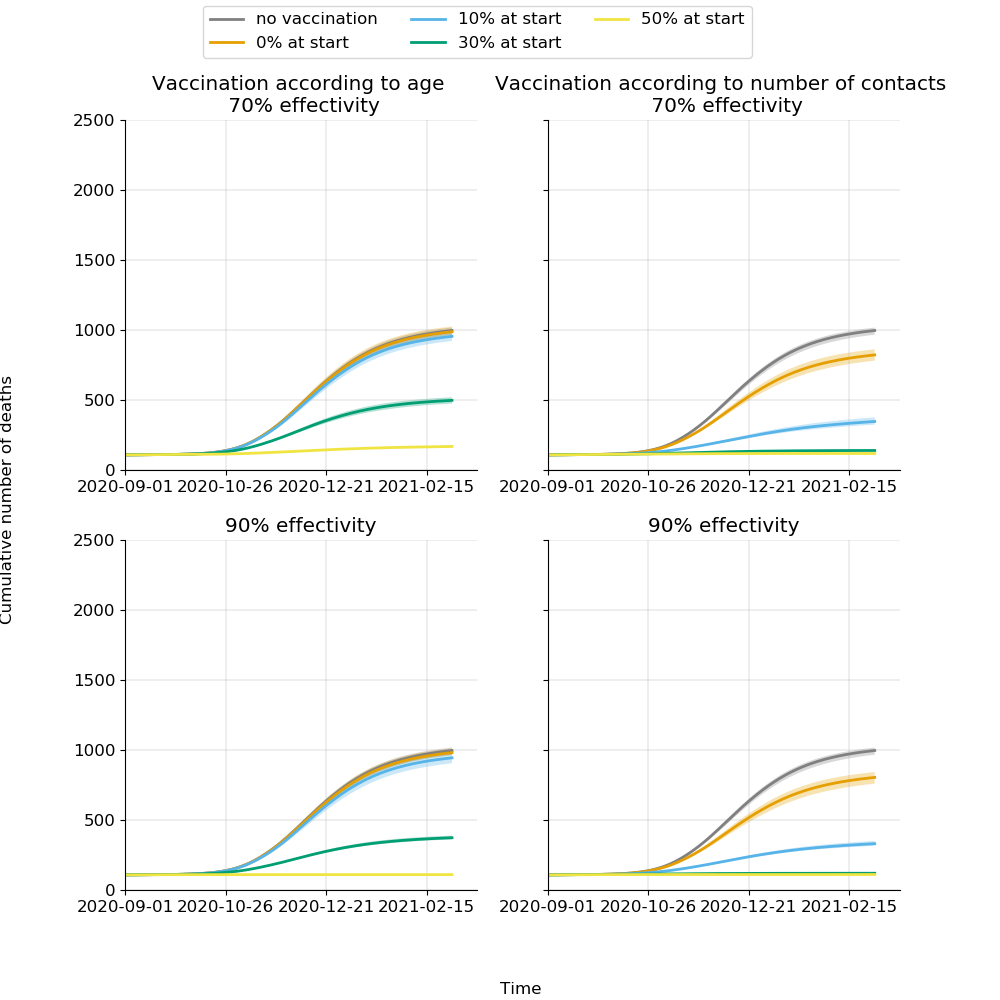

In [85]:
age_group = 5
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize=(10,10), nrows=2, ncols=2, sharex=True, sharey=True)
# ax1.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
#          c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band_age(ax1, y_model_F1, age_group, 'D', 'gray', 'no vaccination')
plot_band_age(ax1, y_model_F2a, age_group, 'D', 'C0', '0% at start')
plot_band_age(ax1, y_model_F2b, age_group, 'D', 'C1', '10% at start')
plot_band_age(ax1, y_model_F2c, age_group, 'D', 'C2', '30% at start')
plot_band_age(ax1, y_model_F2d, age_group, 'D', 'C3', '50% at start')

ax1.set_xlim(start_x, end_x)
ax1.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax1.xaxis.set_tick_params(which='both', labelbottom=True)
ax1.set_title('Vaccination according to age \n 70% effectivity')


# ax2.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
#          c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band_age(ax2, y_model_F1, age_group, 'D', 'gray', 'no vaccination')
plot_band_age(ax2, y_model_F3a, age_group, 'D', 'C0', '0% at start')
plot_band_age(ax2, y_model_F3b, age_group, 'D', 'C1', '10% at start')
plot_band_age(ax2, y_model_F3c, age_group, 'D', 'C2', '30% at start')
plot_band_age(ax2, y_model_F3d, age_group, 'D', 'C3', '50% at start')

ax2.set_xlim(start_x, end_x)
ax2.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax2.xaxis.set_tick_params(which='both', labelbottom=True)
ax2.set_title('Vaccination according to number of contacts \n 70% effectivity')


# ax3.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
#          c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band_age(ax3, y_model_F1, age_group, 'D', 'gray', 'no vaccination')
plot_band_age(ax3, y_model_F4a, age_group, 'D', 'C0', '0% at start')
plot_band_age(ax3, y_model_F4b, age_group, 'D', 'C1', '10% at start')
plot_band_age(ax3, y_model_F4c, age_group, 'D', 'C2', '30% at start')
plot_band_age(ax3, y_model_F4d, age_group, 'D', 'C3', '50% at start')

ax3.set_xlim(start_x, end_x)
ax3.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax3.xaxis.set_tick_params(which='both', labelbottom=True)
ax3.set_title('90% effectivity')

# ax4.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
#          c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band_age(ax4, y_model_F1, age_group, 'D', 'gray', 'no vaccination')
plot_band_age(ax4, y_model_F5a, age_group, 'D', 'C0', '0% at start')
plot_band_age(ax4, y_model_F5b, age_group, 'D', 'C1', '10% at start')
plot_band_age(ax4, y_model_F5c, age_group, 'D', 'C2', '30% at start')
plot_band_age(ax4, y_model_F5d, age_group, 'D', 'C3', '50% at start')

ax4.set_xlim(start_x, end_x)
ax4.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax4.xaxis.set_tick_params(which='both', labelbottom=True)
ax4.set_title('90% effectivity')


ax1.legend(loc='upper center', bbox_to_anchor=(1, 1.35), ncol=3)
ax1.set_ylim(0,2500)
fig.text(0, 0.5, 'Cumulative number of deaths', va='center', rotation='vertical')
fig.text(0.5, 0.01, 'Time', va='center', rotation='horizontal')


fig.savefig('../results/predictions/national/vaccination_wave2_deaths_no_measures_age50-60.pdf')

# Fast plotting

In [ ]:
end_sim = '2021-01-01'

fig,ax=plt.subplots(figsize=(10,4))
model_S2c.parameters['beta'] = np.mean(samples_dict['beta'])
model_S2c.parameters['l'] = np.mean(samples_dict['l'])
model_S2c.parameters['tau'] = np.mean(samples_dict['tau'])
y_model_S2c = model_S2c.sim(end_sim,start_date=start_calibration,warmup=0)

ax.plot(y_model_S2c['time'],y_model_S2c["H_in"].sum(dim="Nc"),color='blue',alpha=1)

ax.scatter(df_sciensano[start_calibration:end_calibration].index,df_sciensano['H_in'][start_calibration:end_calibration],color='black',alpha=0.6,linestyle='None',facecolors='none')

#ax = _apply_tick_locator(ax)
ax.set_xlim('2020-09-01',end_sim)

In [ ]:
    # Define additional dates where intensity or school policy changes
    t1 = pd.Timestamp('2020-09-01') # start vaccination 80+
    t2 = t1 + pd.Timedelta(floor(initN[8]/daily), unit='D')

In [ ]:
n=100
y_model_S1 = model_S1.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)

In [ ]:
fig,ax = plt.subplots(figsize=(10,4))
ax.fill_between(pd.to_datetime(y_model_S1['time'].values),y_model_S1["H_in"].quantile(LL,dim="draws").sum(dim="Nc"), y_model_S1["H_in"].quantile(UL,dim="draws").sum(dim="Nc"),alpha=0.20, color = 'blue')
ax.plot(y_model_S1['time'],y_model_S1["H_in"].mean(dim="draws").sum(dim="Nc"),'--', color='blue')
ax.scatter(df_sciensano[start_calibration:end_sim].index,df_sciensano['H_in'][start_calibration:end_sim],color='black',alpha=0.4,linestyle='None',facecolors='none')

ax.set_ylabel('Number of new hospitalizations')
ax = _apply_tick_locator(ax)

In [ ]:

fig,ax = plt.subplots(figsize=(10,4))
ax.fill_between(pd.to_datetime(y_model_S1['time'].values),y_model_S1["H_tot"].quantile(LL,dim="draws").sum(dim="Nc"), y_model_S1["H_tot"].quantile(UL,dim="draws").sum(dim="Nc"),alpha=0.20, color = 'blue')
ax.plot(y_model_S1['time'],y_model_S1["H_tot"].mean(dim="draws").sum(dim="Nc"),'--', color='blue')
ax.scatter(df_sciensano[start_calibration:end_sim].index,df_sciensano['H_tot'][start_calibration:end_sim],color='black',alpha=0.4,linestyle='None',facecolors='none')

ax.set_ylabel('Total patients in Belgian hospitals')
ax = _apply_tick_locator(ax)

In [ ]:
for t in times:
    v = vacc_policy_old_to_young(t, initN, daily=10000)
    print(v)